# AFL 2 - Covid-19 Dataset 

- Gio Vanni Elbert Wisman (0706022210034)
- Bahar Al Hamid (0706022210033)

In [4]:
import pandas as pd

# Load the dataset
file_path = 'COVID-19 Coronavirus.csv'  
data = pd.read_csv(file_path)

# Check for missing values and data types
data.info()
data.columns = data.columns.str.strip().str.replace("\xa0", " ", regex=True)

# Summarize for missing or null values
missing_summary = data.isnull().sum()
missing_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [5]:
# Dropping unnecessary columns: "Other names" and "ISO 3166-1 alpha-3 CODE"
data_cleaned = data.drop(columns=["Other names", "ISO 3166-1 alpha-3 CODE"])

# Renaming columns for consistency
data_cleaned.rename(columns={
    "Tot Cases//1M pop": "Total Cases per Million",
    "Tot Deaths/1M pop": "Total Deaths per Million"
}, inplace=True)

# Display the cleaned dataset structure
data_cleaned.info()

# Show a preview of the cleaned dataset
data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   225 non-null    object 
 1   Population                225 non-null    int64  
 2   Continent                 225 non-null    object 
 3   Total Cases               225 non-null    int64  
 4   Total Deaths              225 non-null    int64  
 5   Total Cases per Million   225 non-null    int64  
 6   Total Deaths per Million  225 non-null    int64  
 7   Death percentage          225 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 14.2+ KB


,Country,Population,Continent,Total Cases,Total Deaths,Total Cases per Million,Total Deaths per Million,Death percentage
0,Afghanistan,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,34654212,Africa,99194,1900,2862,55,1.915438


In [6]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for clustering
numerical_cols = [
    "Population",
    "Total Cases",
    "Total Deaths",
    "Total Cases per Million",
    "Total Deaths per Million",
    "Death percentage"
]

# Scaling numerical features
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_cleaned[numerical_cols])

# Creating a DataFrame with normalized data for clarity
data_normalized_df = pd.DataFrame(data_normalized, columns=numerical_cols)

# Display the normalized data
data_normalized_df.head()

,Population,Total Cases,Total Deaths,Total Cases per Million,Total Deaths per Million,Death percentage
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


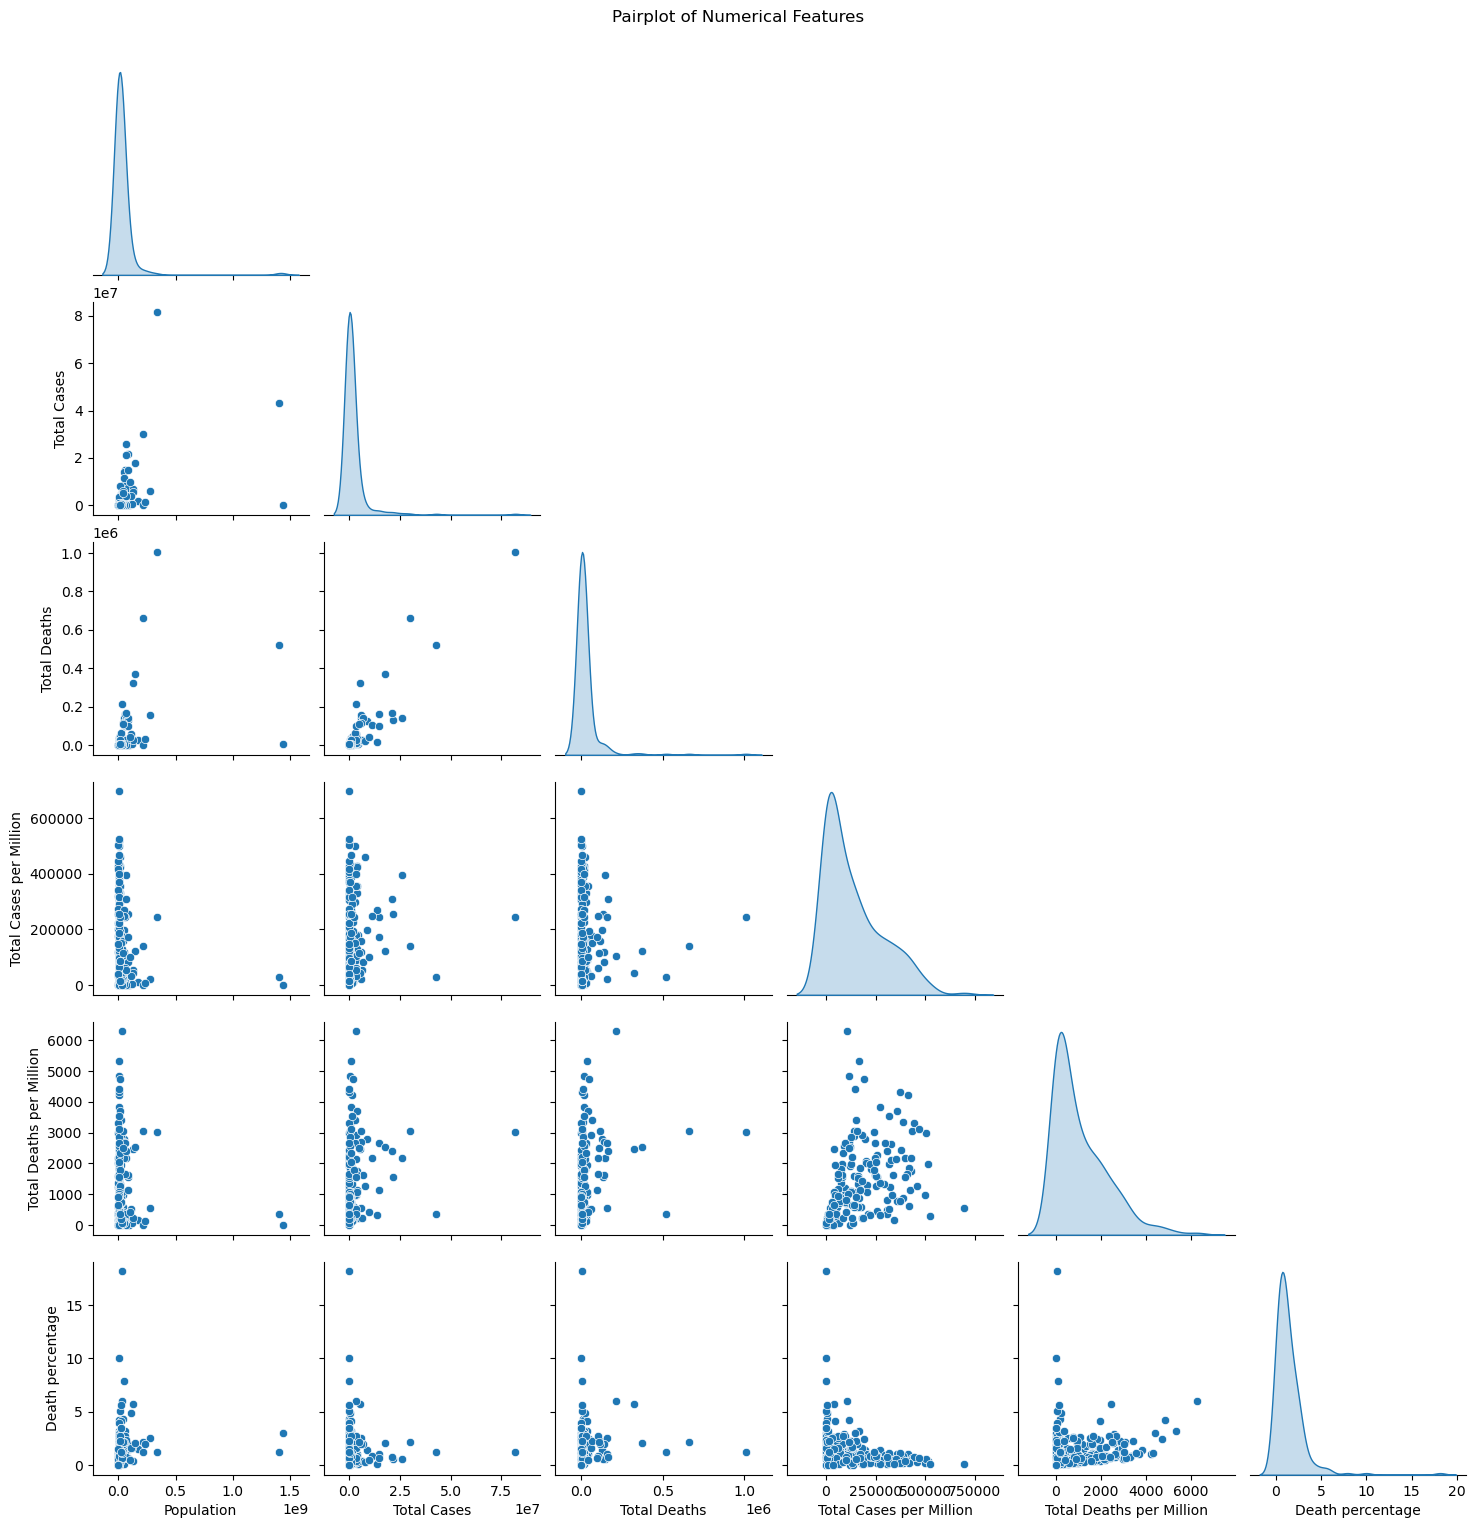

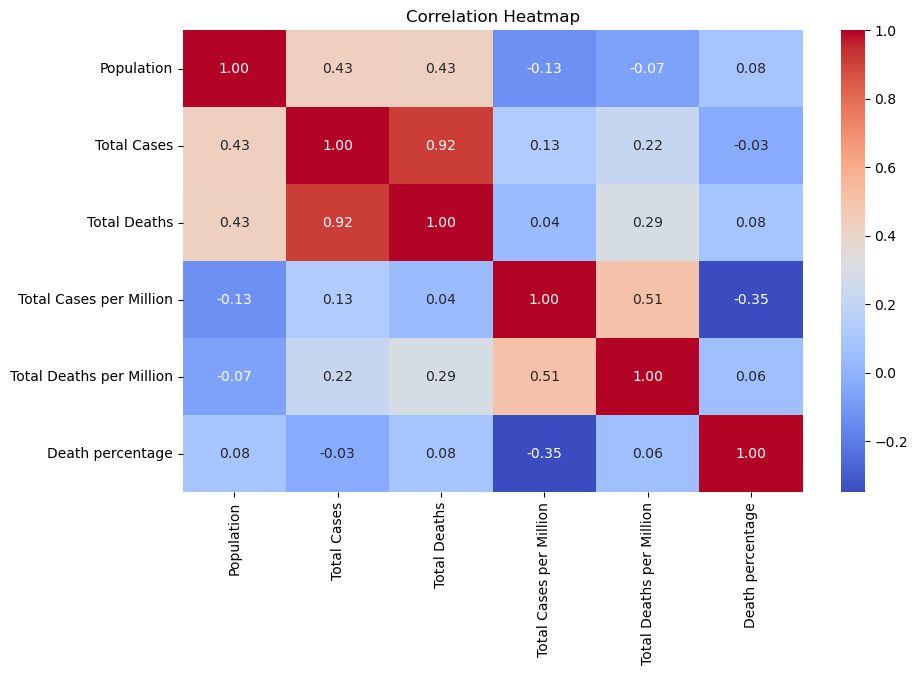

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a general plotting style
plt.style.use('default')

# Pairplot of numerical features to explore relationships
sns.pairplot(data_cleaned[numerical_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Plot histograms for individual numerical features
data_normalized.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Numerical Features", y=0.95)
plt.show()

# Boxplots for detecting outliers
plt.figure(figsize=(15, 8))
data_normalized.boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

C:\Users\GEOVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GEOVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\GEOVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GEOVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

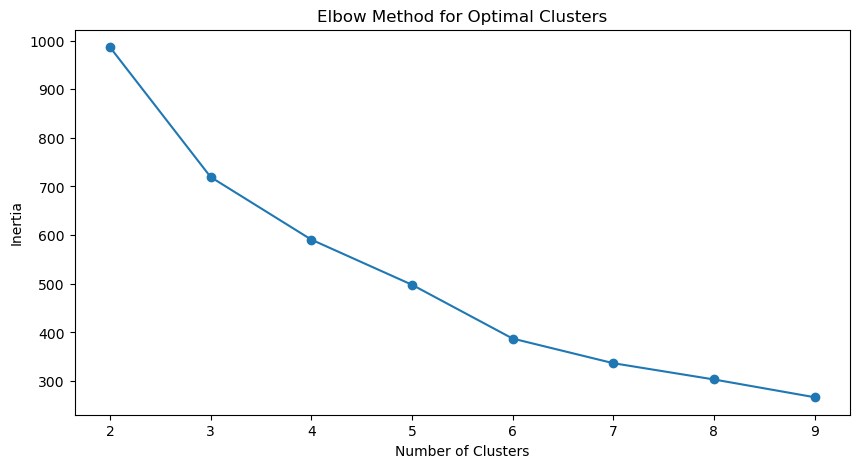

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 10)  # Testing 2 to 9 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_normalized, kmeans.labels_))

# Plot the elbow method results
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [9]:
# Apply K-Means clustering with the chosen number of clusters (4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_normalized)

# Analyze the clusters by visualizing cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numerical_cols)
cluster_centers.index = [f"Cluster {i}" for i in range(optimal_clusters)]

# Display the cluster centers in a tabular format for easy interpretation
from tabulate import tabulate

# Convert cluster centers to a tabular format
cluster_centers_table = tabulate(cluster_centers, headers='keys', tablefmt='pretty')
print("K-Means Cluster Centers:\n")
print(cluster_centers_table)

C:\Users\GEOVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GEOVANI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means Cluster Centers:

+-----------+--------------------+--------------------+--------------------+-------------------------+--------------------------+--------------------+
|           |     Population     |    Total Cases     |    Total Deaths    | Total Cases per Million | Total Deaths per Million |  Death percentage  |
+-----------+--------------------+--------------------+--------------------+-------------------------+--------------------------+--------------------+
| Cluster 0 | 24606183.09774436  | 647267.2857142859  | 8257.827067669179  |   44235.751879699295    |    399.2857142857142     | 1.663359280293233  |
| Cluster 1 | 13933705.295454554 | 2846211.6818181816 | 32761.602272727272 |   278458.32954545453    |    2127.2613636363635    | 1.0915842454545455 |
| Cluster 2 |    274802549.0     |     55919434.0     |      834245.5      |        192067.5         |          3041.5          |    1.716433626     |
| Cluster 3 |    1421539078.5    |     21591891.0     |      263013.